In [1]:
# Import the dependencies.
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.00, high=90.00, size=1500)
lngs = np.random.uniform(low=180.00, high=180.00, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes in a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities=[]
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

19

In [6]:
# Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | dunedin
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | ruatoria
City not found. Skipping...
Processing Record 5 of Set 1 | otane
Processing Record 6 of Set 1 | leningradskiy
Processing Record 7 of Set 1 | asau
Processing Record 8 of Set 1 | beringovskiy
Processing Record 9 of Set 1 | rungata
City not found. Skipping...
Processing Record 10 of Set 1 | gisborne
Processing Record 11 of Set 1 | ngunguru
Processing Record 12 of Set 1 | isangel
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | waipawa
Processing Record 15 of Set 1 | russell
Processing Record 16 of Set 1 | tolaga bay
Processing Record 17 of Set 1 | christchurch
Processing Record 18 of Set 1 | rawannawi
City not found. Skipping...
Processing Record 19 of Set 1 | anadyr
-----------------------------
Data Retrieval Complete      
------------------

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,81.68,78,78,17.65,KI,2023-01-18 01:25:21
1,Dunedin,-45.8742,170.5036,62.80,70,39,4.00,NZ,2023-01-18 01:25:21
2,Kaitangata,-46.2817,169.8464,63.63,63,6,8.25,NZ,2023-01-18 01:25:22
3,Otane,-39.8833,176.6333,67.01,63,100,7.76,NZ,2023-01-18 01:25:22
4,Leningradskiy,69.3833,178.4167,-28.79,97,91,8.10,RU,2023-01-18 01:25:23
5,Asau,46.4333,26.4000,40.28,80,78,5.88,RO,2023-01-18 01:25:23
6,Beringovskiy,63.0500,179.3167,-17.19,94,98,14.61,RU,2023-01-18 01:25:24
7,Gisborne,-38.6533,178.0042,62.94,86,100,9.15,NZ,2023-01-18 01:25:25
8,Ngunguru,-35.6167,174.5000,67.32,67,100,12.06,NZ,2023-01-18 01:25:25
9,Isangel,-19.5500,169.2667,80.71,83,100,5.75,VU,2023-01-18 01:22:48


In [11]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2023-01-18 01:25:21,3.0707,172.7902,81.68,78,78,17.65
1,Dunedin,NZ,2023-01-18 01:25:21,-45.8742,170.5036,62.80,70,39,4.00
2,Kaitangata,NZ,2023-01-18 01:25:22,-46.2817,169.8464,63.63,63,6,8.25
3,Otane,NZ,2023-01-18 01:25:22,-39.8833,176.6333,67.01,63,100,7.76
4,Leningradskiy,RU,2023-01-18 01:25:23,69.3833,178.4167,-28.79,97,91,8.10
5,Asau,RO,2023-01-18 01:25:23,46.4333,26.4000,40.28,80,78,5.88
6,Beringovskiy,RU,2023-01-18 01:25:24,63.0500,179.3167,-17.19,94,98,14.61
7,Gisborne,NZ,2023-01-18 01:25:25,-38.6533,178.0042,62.94,86,100,9.15
8,Ngunguru,NZ,2023-01-18 01:25:25,-35.6167,174.5000,67.32,67,100,12.06
9,Isangel,VU,2023-01-18 01:22:48,-19.5500,169.2667,80.71,83,100,5.75


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

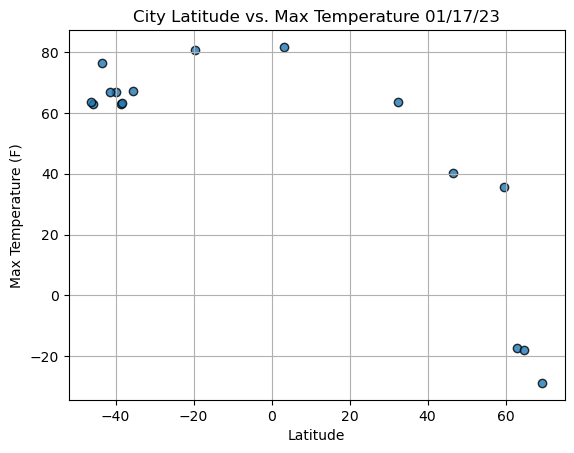

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

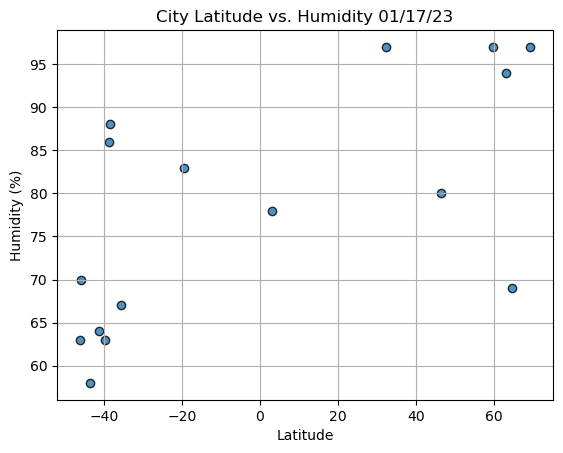

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

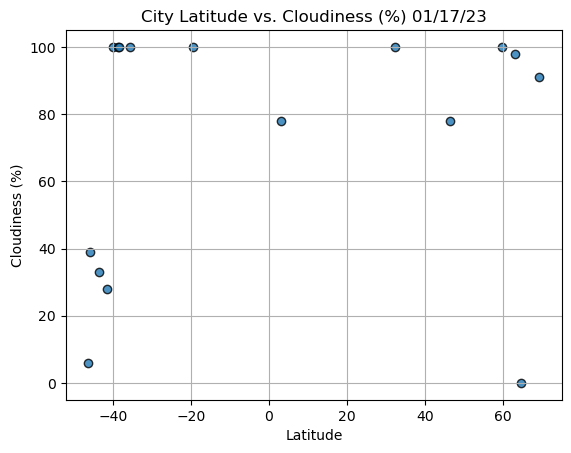

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()